In [1]:
pip install easyocr

     |████████████████████████████████| 70.8 MB 11 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 


In [2]:
!pip install pillow==4.1.1

     |████████████████████████████████| 11.3 MB 5.5 MB/s 
     |████████████████████████████████| 112 kB 50.0 MB/s 
  Created wheel for pillow: filename=Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl size=1009842 sha256=4781a15094c2fad3d6971dccbcd99176ae1b9eff96ea6162caa271f1398b84d8
  Stored in directory: /root/.cache/pip/wheels/51/53/67/d76ff9fd54dd89a25efce20d2e7c9b35348db386b53deb8095
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=5c4a39195a43f8cf2abfa17ccac61a188ec2b66331a03435d897aeba50d6e66a
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built pillow olefile
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency co

In [1]:
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import re
import easyocr
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [2]:
def adhar_front(n):
    ''' Creating a Function for framing all data'''
    names = None
    for i in n:
          if i.isupper() and re.match('[^0-9]*$',i):
              if re.match("\w{2,10}\s\w{2,10}\s\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{2,10}\s\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{5,15}",i):
                    names = i
              

          if i.istitle() and re.match('[^0-9]*$',i):
              if re.match("\w{2,10}\s\w{2,10}\s\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{2,10}\s\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{2,10}\s\w{2,10}",i):
                    names = i
              elif re.match("\w{5,15}",i):
                    names = i
          else:
                pass
    
    if len(names.split(' ')) == 1:   
        first_name = names.split(' ')[0]
        last_name = None
    else:
        first_name = names.split(' ')[0]
        last_name = names.split(' ')[-1]
    adhar_number = None
    for i in n:
        if re.match("\w{4}\s\w{4}\s\w{4}",i):
              adhar_number = i
    gender = None
    for i in n:
        for j in i.split():  
            if 'Female' in j or 'FEMALE' in j:
                    gender = "Female"
            elif 'Male' in j or 'MALE' in j:
                    gender = "Male"
    ayear = None
    yearline = []
    text1 = []
    for i in n:
        for j in i.split():
            if re.search('(Birth : |irth|YoB|YOB:|DOB:|DOB)$', j):
                yearline = i
                break
              
            else:
                text1.append(i)
    try:
          yearline = re.split('YoB|YOB:|DOB:|DOB', yearline)[1:]
          yearline = ''.join(str(e) for e in yearline)
          if yearline:
              ayear = dparser.parse(yearline, fuzzy=True).year
    except Exception:
          pass
    if len(yearline) == 0:
        for i in n:
           if re.match('\w{4}',i) and i.isdigit():
              yearline =i

    print('first_name : ',first_name,' last_name :',last_name,'DOB :',yearline,'Gender :',gender,'Adhar_number :',adhar_number)

In [27]:
def adhar_back(n):    
    add = []
    for i in n:
        for j in i.split():
            if re.search('(Address:|address|Add|Addres:)$', j):
        
                matched_str = i
                add.append(i)
                index_matched_str = n.index(i)
                next = index_matched_str+1
                temp = n[next]
                add.append(temp)
    add1 = " ".join(add)
    add2 = add1.split()
    add2.remove(add2[0])
    add3 = " ".join(add2)
    print("Address : ",add3) 


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1694, 2686, 3)


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

['7',
 '988 / Male',
 'NIHAR RANJAN SWAIN',
 '8RT',
 '8',
 '467iat',
 '5927 7742 1254',
 '3wi8 8wq 9i8',
 'Government of India',
 'HT 3TYR , A',
 'DOB: 05/03/1994',
 '38 8i88',
 '"ITer',
 'TRET',
 '1']

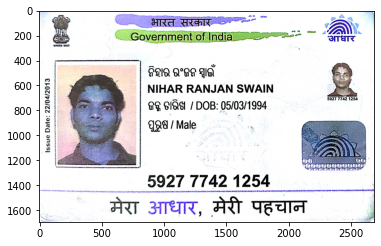

In [4]:
image1_front = cv2.imread('adhar1_front.jpg')
print(image1_front.shape)
plt.imshow(image1_front)

reader = easyocr.Reader(['en']) 
ocr_text_front1 = reader.readtext(image1_front,detail=0)

ocr_text_front1 =list(set(ocr_text_front1))

if 'GOVERNMENT OF INDIA' in ocr_text_front1:

    ocr_text_front1.remove('GOVERNMENT OF INDIA')

ocr_text_front1 

Aadhar Car

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1913, 2959, 3)


['G3 81661 /DOB: 05/03/1994',
 'Qi83 908i0',
 'MHAR RANJAN SWAIN',
 'VID',
 'Government @f India',
 'assa',
 '938/ MALE',
 '521 6805',
 '; 9118 9875 9105 0613',
 'ae16',
 'Gal',
 '2',
 '5927 7742 1254',
 '69I',
 'Zijin',
 '#iaig;',
 '1']

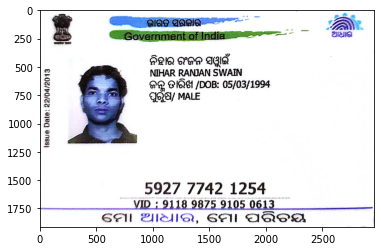

In [5]:
image2_front = cv2.imread('adhar2_front.jpg')
print(image2_front.shape)
plt.imshow(image2_front)

reader = easyocr.Reader(['en']) 
ocr_text_front2 = reader.readtext(image2_front,detail=0)

ocr_text_front2 = list(set(ocr_text_front2))

if 'GOVERNMENT OF INDIA' in ocr_text_front2:

    ocr_text_front2.remove('GOVERNMENT OF INDIA')

ocr_text_front2 

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(316, 563, 3)


['H1HR',
 'TrIC Fa6',
 'BIRdTREART',
 'HIH  H14H #T Hfea77',
 'Government of India',
 'Female',
 'Gayatri Singh',
 '2621 4644 2086',
 'DOB: 05/05/1995',
 '47 0',
 'Aiear']

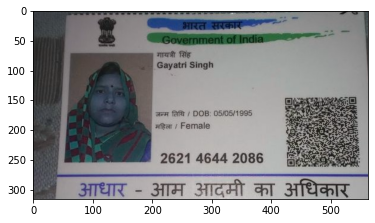

In [6]:
image3_front = cv2.imread('adhar3_front.jpg')
print(image3_front.shape)
plt.imshow(image3_front)

reader = easyocr.Reader(['en']) 
ocr_text_front3 = reader.readtext(image3_front,detail=0)

ocr_text_front3 = list(set(ocr_text_front3))

if 'GOVERNMENT OF INDIA' in ocr_text_front3:

    ocr_text_front3.remove('GOVERNMENT OF INDIA')

ocr_text_front3

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(243, 400, 3)


['Jlo444 / Year of Birth',
 'M14 Mrt #T 3fedT',
 '59',
 '1977',
 'Male',
 '319R',
 'Jeevan Pant',
 'add 4d',
 '4422 3293 30']

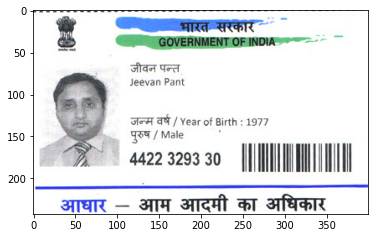

In [8]:
image4_front = cv2.imread('adhar4_front.jpeg')
print(image4_front.shape)
plt.imshow(image4_front)

reader = easyocr.Reader(['en']) 
ocr_text_front4 = reader.readtext(image4_front,detail=0)

ocr_text_front4 = list(set(ocr_text_front4))

if 'GOVERNMENT OF INDIA' in ocr_text_front4:

    ocr_text_front4.remove('GOVERNMENT OF INDIA')

ocr_text_front4

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(316, 563, 3)


['IENTOFINDIA',
 'QuveAN',
 'MALE',
 '6056 6565 9631',
 'Vimal Kumar',
 'J74 Faf4l DOB: 12/12/1958',
 'tI41',
 'IT"uttn',
 '1']

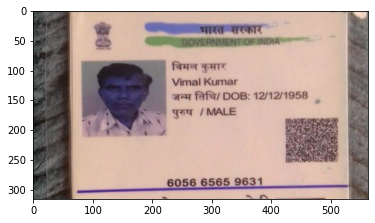

In [9]:
image5_front = cv2.imread('adhar5_front.jpg')
print(image5_front.shape)
plt.imshow(image5_front)

reader = easyocr.Reader(['en']) 
ocr_text_front5 = reader.readtext(image5_front,detail=0)

ocr_text_front5 = list(set(ocr_text_front5))

if 'GOVERNMENT OF INDIA' in ocr_text_front5:

    ocr_text_front5.remove('GOVERNMENT OF INDIA')

ocr_text_front5 

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1368, 2184, 3)


['7317 1081 3184',
 'Arun Kumar Murugan Nadar',
 '5Sq',
 '9Tdr erenr',
 '3FuT FHT TT TTET',
 'Male',
 '37rer',
 '_&NR TRTAT eferaar',
 '74 4d / Year of Birth',
 '1998']

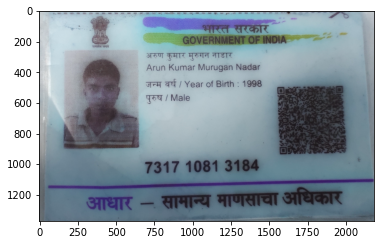

In [10]:
image6_front = cv2.imread('adhar6_front.jpg')
print(image6_front.shape)
plt.imshow(image6_front)

reader = easyocr.Reader(['en']) 
ocr_text_front6 = reader.readtext(image6_front,detail=0)

ocr_text_front6 = list(set(ocr_text_front6))

if 'GOVERNMENT OF INDIA' in ocr_text_front6:

    ocr_text_front6.remove('GOVERNMENT OF INDIA')

ocr_text_front6

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1704, 2656, 3)


['HRT',
 'HTT',
 '4324 0802',
 'DOB : 18/01/2000',
 'Government of India',
 'Male',
 'RT',
 '3e, 4i 41at',
 'Rathod Viren Prakash',
 '3201']

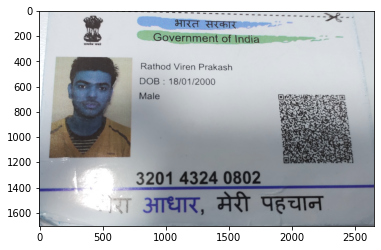

In [11]:
image7_front = cv2.imread('adhar7_front.jpg')
print(image7_front.shape)
plt.imshow(image7_front)

reader = easyocr.Reader(['en']) 
ocr_text_front7 = reader.readtext(image7_front,detail=0)

ocr_text_front7 = list(set(ocr_text_front7))

if 'GOVERNMENT OF INDIA' in ocr_text_front7:

    ocr_text_front7.remove('GOVERNMENT OF INDIA')

ocr_text_front7

In [12]:
adhar_front(ocr_text_front1)
adhar_front(ocr_text_front2)
adhar_front(ocr_text_front3)
adhar_front(ocr_text_front4)
adhar_front(ocr_text_front5)
adhar_front(ocr_text_front6)
adhar_front(ocr_text_front7)


first_name :  NIHAR  last_name : SWAIN DOB :  05/03/1994 Gender : Male Adhar_number : 5927 7742 1254
first_name :  Zijin  last_name : None DOB :  05/03/1994 Gender : Male Adhar_number : 5927 7742 1254
first_name :  Aiear  last_name : None DOB :  05/05/1995 Gender : Female Adhar_number : 2621 4644 2086
first_name :  Jeevan  last_name : Pant DOB : 1977 Gender : Male Adhar_number : None
first_name :  Vimal  last_name : Kumar DOB :  12/12/1958 Gender : Male Adhar_number : 6056 6565 9631
first_name :  Arun  last_name : Nadar DOB : 1998 Gender : Male Adhar_number : 7317 1081 3184
first_name :  Rathod  last_name : Prakash DOB :  : 18/01/2000 Gender : Male Adhar_number : None


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1694, 2686, 3)


['#RA Tarrz ntn Wfuarut',
 'Unique Idenhfic non Authiority Of India',
 'AADHAAR',
 'ocat 9888: aS8 5Q8',
 'qi6, &ekz , Q8Q, Cwa',
 '754204',
 '1',
 '1',
 'Address: CIO: Ananta Charan Swain',
 'Khartang, Cuttack, Odisha, 754204',
 '1',
 '5927 7742 1254',
 '1947',
 'help@uidai.gov.in',
 'www.uidai.gov.in']

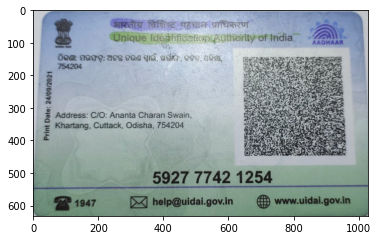

In [21]:
image1_back = cv2.imread('adhar1_back.jpeg')
print(image1_front.shape)
plt.imshow(image1_back)

reader = easyocr.Reader(['en']) 
ocr_text_back1 = reader.readtext(image1_back,detail=0)

#ocr_text_back1 = list(set(ocr_text_back1))

ocr_text_back1

(1913, 2959, 3)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


['QI619 &a8 a68* g14qoa',
 'Unique Identification Authority OfIndia',
 '31410',
 'Oaal:',
 '9q08 24@ 696 916,',
 '666',
 '1',
 '8381',
 '754204',
 '1',
 'Address:',
 'CIO: Ananta Charan Swain; Khartang',
 'Cuiac,',
 '3ouisha',
 '754204',
 ']',
 '5927 7742 1254',
 'VID',
 '8',
 '9118 9875 9105 0613',
 '1947',
 'helpauldel-govIn',
 'www-uldal-gouIn',
 "G1618'"]

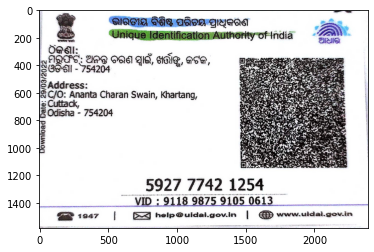

In [23]:
image2_back = cv2.imread('adhar2_back.jpg')
print(image2_front.shape)
plt.imshow(image2_back)

reader = easyocr.Reader(['en']) 
ocr_text_back2 = reader.readtext(image2_back,detail=0)


ocr_text_back2

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1368, 2184, 3)


['WAfeifnez elart qifereatur',
 'UnQLVE ANIAIEATONeAudhOrITy Of-INdIA',
 'aar',
 'T7 &07-1-40, 4t/7 , 947-9,',
 '7f',
 'Address: JN-1-40, B/7',
 'Sector-9.',
 '14, areft, 3ru , 3Trt , WETT? ,',
 'Navi Mumbai, Vashi; Thane,',
 '400703',
 'Thane,',
 'Maharashtra, 400703',
 'a/taia',
 'wwWuidai gov.in',
 'PO:Box No: 1947,',
 '71947',
 'help@uldal -gov.In',
 'pengaluru-580 001}',
 '1800 180 1947']

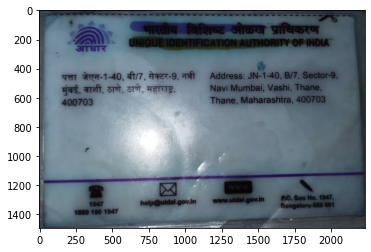

In [24]:
image6_back = cv2.imread('adhar6_back.jpg')
print(image6_front.shape)
plt.imshow(image6_back)

reader = easyocr.Reader(['en']) 
ocr_text_back6 = reader.readtext(image6_back,detail=0)


ocr_text_back6

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


(1704, 2656, 3)


['2&-',
 'HRaly fafree Yadat Mifeerut',
 '3ter',
 'Unique Identification Authority of India',
 'Address: 42 AVANIKA PARK SOCIETY,',
 'KHANPUR, Ahmadabad City, Ahmedabad',
 'G.p.o, Ahmadabad, Gujarat, 380001',
 '3201',
 '4324 0802',
 'WWW',
 '1947',
 'help @uidai.gov.in',
 'WWuidai gov.in']

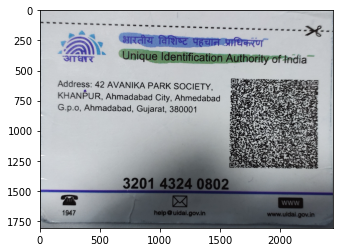

In [25]:
image7_back = cv2.imread('adhar7_back.jpg')
print(image7_front.shape)
plt.imshow(image7_back)

reader = easyocr.Reader(['en']) 
ocr_text_back7 = reader.readtext(image7_back,detail=0)


ocr_text_back7

Aadhar Card Sample 4

In [28]:
adhar_back(ocr_text_back1)
adhar_back(ocr_text_back2)
adhar_back(ocr_text_back6)
adhar_back(ocr_text_back7)

Address :  CIO: Ananta Charan Swain Khartang, Cuttack, Odisha, 754204
Address :  CIO: Ananta Charan Swain; Khartang
Address :  JN-1-40, B/7 Sector-9.
Address :  42 AVANIKA PARK SOCIETY, KHANPUR, Ahmadabad City, Ahmedabad
